In [1]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_google = pd.read_csv('googleplaystore.csv')

In [5]:
df_google.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df_google.shape

(10841, 13)

In [7]:
df_google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


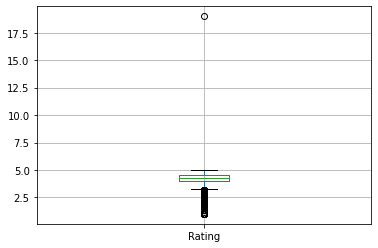

In [9]:
df_google.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf6c30de80>]],
      dtype=object)

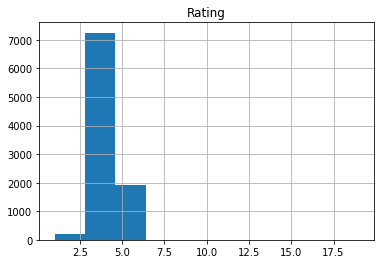

In [11]:
df_google.hist()

In [12]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
#missing data
total = df_google.isnull().sum().sort_values(ascending=False)
percent = (df_google.isnull().sum()/len(df_google)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [60]:
df_google[df_google['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [34]:
df_google.shape

(10841, 13)

In [61]:
df_google2 = df_google.drop([10472])
df_google2.shape

(10840, 13)

In [17]:
df_google2[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


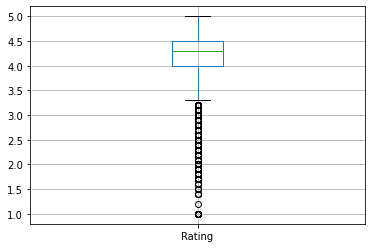

In [36]:
df_google2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf62c52d30>]],
      dtype=object)

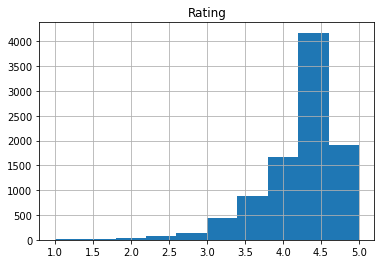

In [37]:
df_google2.hist()

In [62]:
#missing data
total2 = df_google2.isnull().sum().sort_values(ascending=False)
percent2 = (df_google2.isnull().sum()/len(df_google2)).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(30)

,Total,Percent
Rating,1474,0.135978
Current Ver,8,0.000738
Android Ver,2,0.000185
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [64]:
df_google2['Rating'] = df_google2['Rating'].fillna(df_google2['Rating'].median())
df_google2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [65]:
print(df_google2['Type'].mode())
print(df_google2['Current Ver'].mode())
print(df_google2['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [70]:
df_google2['Type'] = df_google2['Type'].fillna(df_google2['Type'].mode()[0])
df_google2['Current Ver'] = df_google2['Current Ver'].fillna(df_google2['Current Ver'].mode()[0])
df_google2['Android Ver'] = df_google2['Android Ver'].fillna(df_google2['Android Ver'].mode()[0])

In [71]:
df_google2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [84]:
df_google2['Price'] = df_google2['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df_google2['Price'] = df_google2['Price'].apply(lambda x: float(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: float(x))
df_google2['Reviews'] = df_google2['Reviews'].apply(lambda x: float(x))

In [80]:
df_google2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [85]:
df_google2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [86]:
df_google2.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [93]:
group = df_google2.groupby('Category')
rating_group = group['Rating'].agg(np.mean)
price_group = group['Price'].agg(np.sum)
reviews_group =  group['Reviews'].agg(np.mean)
print('Rating group:\n', rating_group)
print('Price group:\n', price_group)
print('Reviews group:\n', reviews_group)

Rating group:
 Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL

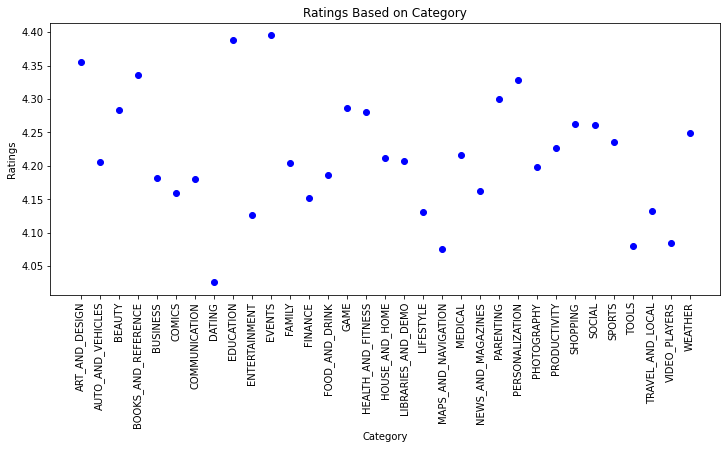

In [106]:
#sns.barplot(rating_group)
plt.figure(figsize = (12, 5))
plt.plot(rating_group, 'ro', color = 'b')
plt.xticks(rotation = 90)
plt.title('Ratings Based on Category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

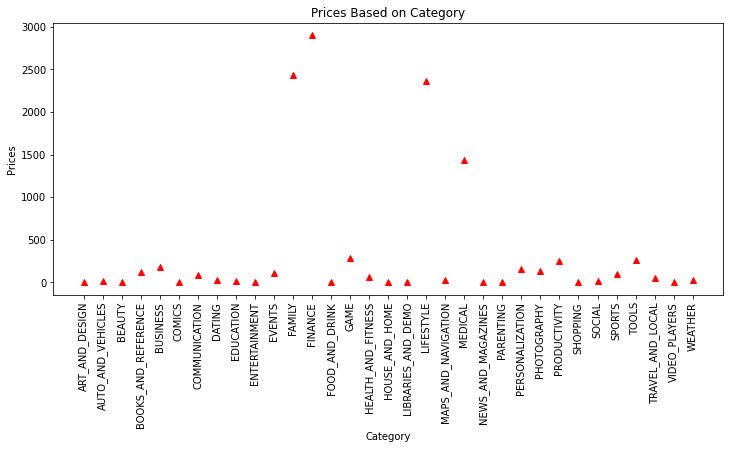

In [109]:
plt.figure(figsize = (12, 5))
plt.plot(price_group, 'g^', color = 'r')
plt.xticks(rotation = 90)
plt.title('Prices Based on Category')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()

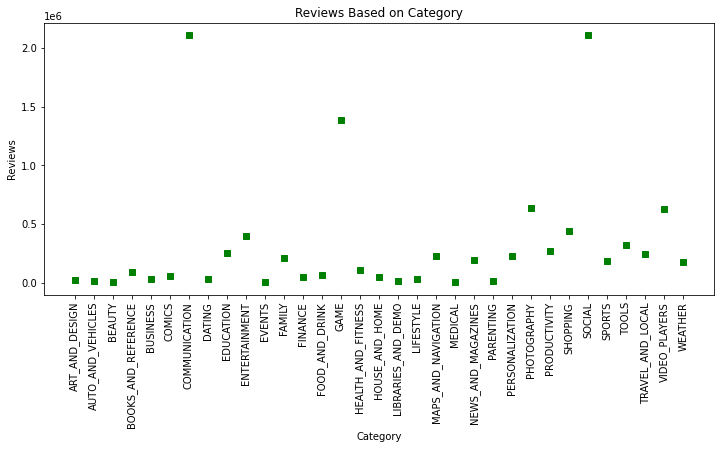

In [113]:
#sns.barplot(rating_group)
plt.figure(figsize = (12, 5))
plt.plot(reviews_group, 'bs', color = 'g')
plt.xticks(rotation = 90)
plt.title('Reviews Based on Category')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()